In [2]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
load_dotenv()

False

In [3]:
cities=["Atlanta","Detroit", "Tampa", "Las Vegas", "Miami", "New Orleans", "Washington", "Baltimore", "Portland", "San Francisco"]

In [4]:
house_values_df = pd.read_csv("house_values_zillow.csv")
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]
years = np.arange(2012,2022,1)
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]
# filtered_hv_21_22_df.head(10)
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)
# filtered_hv_21_22_df.head(50)
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)



C:\Users\puckr\AppData\Local\Temp\ipykernel_17948\50528981.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_17948\50528981.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_17948\50528981.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [5]:
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)

# 
# .set_index("City")

real_estate_prices.head(20)

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,
Las Vegas,116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [6]:
real_estate_prices = real_estate_prices.transpose()
# real_estate_prices.reset_index(inplace=True)
real_estate_prices.head(20)

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Washington
2012,116934.02,615246.15,176634.14,241196.14,359139.04,18268.31,82727.12,129823.45,94281.68,133398.32,194433.05
2013,132081.22,738878.23,198546.61,262656.43,390497.70,18558.24,88046.07,137038.97,105523.51,151844.94,215344.61
2014,172615.98,856989.05,243519.36,294454.36,438557.80,21539.87,100469.70,164578.79,125687.16,169244.27,239084.18
2015,186985.34,996609.03,270890.51,321556.13,469496.04,24639.40,102555.31,187047.11,139028.21,164669.67,255482.93
2016,202048.00,1153086.87,299043.90,376282.19,499357.15,28344.16,106097.47,212547.31,157266.05,188042.57,274226.33
2017,213888.35,1145789.14,312017.37,422003.08,518851.06,30799.03,110515.43,237702.12,179400.84,195911.78,290371.11
2018,247569.68,1254291.74,324711.58,438346.34,538924.71,35183.51,116700.62,267426.54,198929.01,193453.83,301436.79
2019,280512.33,1306153.19,335967.65,437420.14,565816.32,42025.86,126707.41,297186.94,214526.43,199919.76,307323.98
2020,286778.62,1330689.65,347039.40,445584.98,577273.60,46631.19,137095.08,305776.44,227796.30,223361.01,317628.31
2021,305781.91,1347232.32,369467.39,486544.44,615740.57,57106.31,148247.53,325108.90,255955.56,237387.08,339252.69


In [7]:
scaler = StandardScaler()
scaled_real_estate_prices = scaler.fit_transform(real_estate_prices)
scaled_real_estate_prices_df = scaled_df = pd.DataFrame(scaled_real_estate_prices, columns=real_estate_prices.columns)
print(real_estate_prices)
print(scaled_real_estate_prices_df)

Year  Las Vegas  San Francisco      Miami   Portland  Washington   Detroit  \
2012  116934.02      615246.15  176634.14  241196.14   359139.04  18268.31   
2013  132081.22      738878.23  198546.61  262656.43   390497.70  18558.24   
2014  172615.98      856989.05  243519.36  294454.36   438557.80  21539.87   
2015  186985.34      996609.03  270890.51  321556.13   469496.04  24639.40   
2016  202048.00     1153086.87  299043.90  376282.19   499357.15  28344.16   
2017  213888.35     1145789.14  312017.37  422003.08   518851.06  30799.03   
2018  247569.68     1254291.74  324711.58  438346.34   538924.71  35183.51   
2019  280512.33     1306153.19  335967.65  437420.14   565816.32  42025.86   
2020  286778.62     1330689.65  347039.40  445584.98   577273.60  46631.19   
2021  305781.91     1347232.32  369467.39  486544.44   615740.57  57106.31   
2022  378531.44     1437822.96  430181.47  540430.84   631401.93  68524.97   

Year  Baltimore    Atlanta      Tampa  New Orleans  Washington 

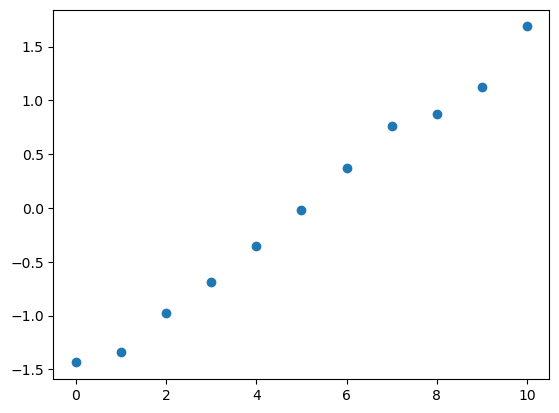

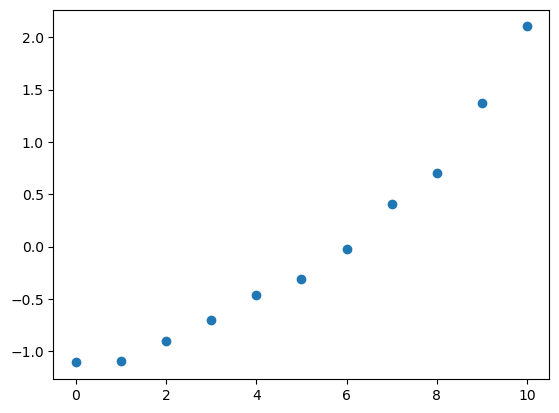

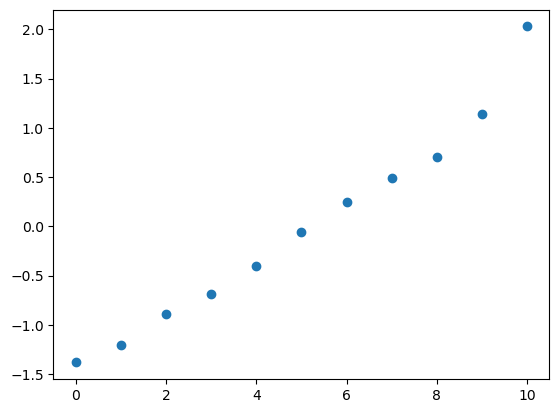

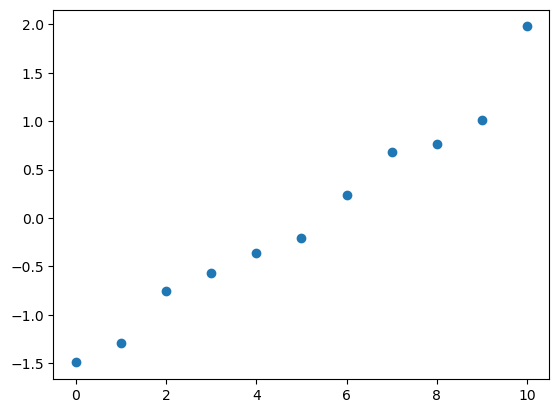

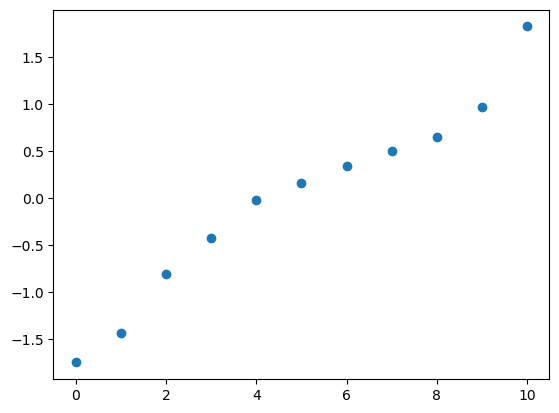

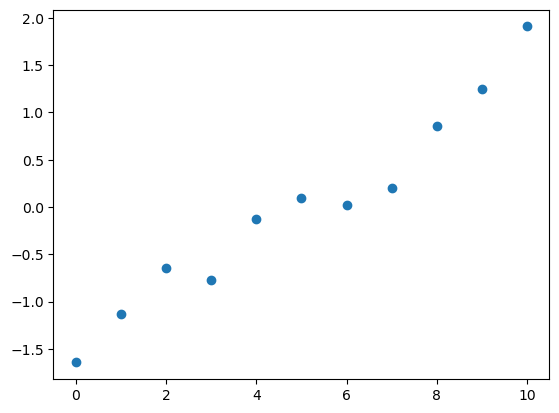

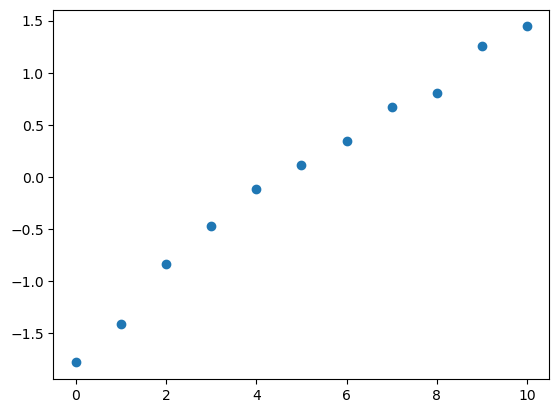

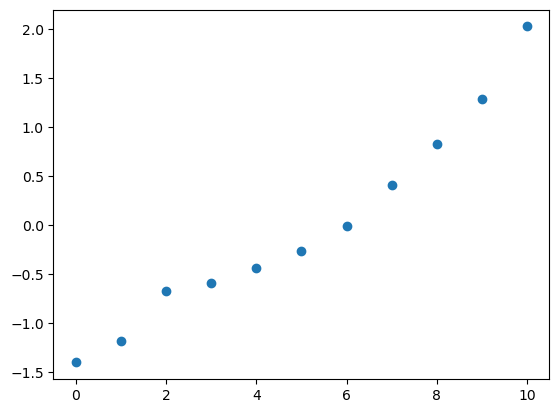

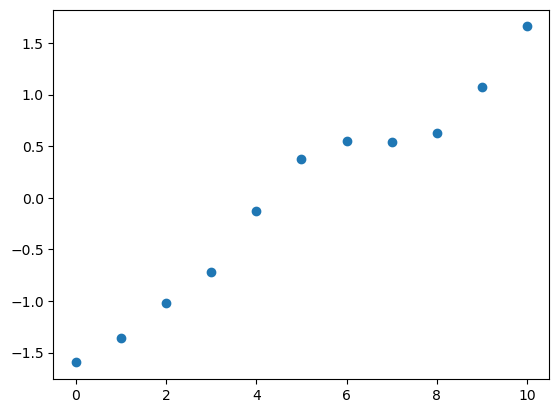

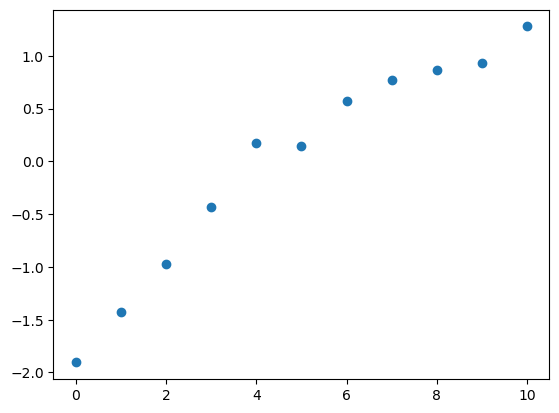

In [8]:
scaled_real_estate_prices_plot = pd.DataFrame(scaled_real_estate_prices_df)
scaled_real_estate_prices_plot = scaled_real_estate_prices_plot.iloc[:, :-1] # drops extra washington
x = scaled_real_estate_prices_plot.index
for city in cities:
    y = scaled_real_estate_prices_plot[city]
    plt.scatter(x, y, label=city)
    plt.show()

In [15]:
#read in crime data and create data frame

crime_by_city_data = pd.read_csv("us_crime_data_by_city - Sheet1.csv")
crime_by_city_data.columns

Index(['Year', 'Las Vegas Pop', 'Las Vegas Crime', 'Las Vegas', 'San Fran Pop',
       'San Fran Crime', 'San Francisco', 'Miami Pop', 'Miami Crime', 'Miami',
       'Portland Pop', 'Portand Crime', 'Portland ', 'Wash Pop', 'Wash Crime',
       'Washington', 'Detroit Pop', 'Detroit Crime', 'Detroit', 'Balt Pop',
       'Balt Cirme', 'Baltimore', 'Atlanta Pop', 'Atlanta Crime', 'Atlanta',
       'Tampa Pop', 'Tampa Crime', 'Tampa', 'New Orleans Pop',
       'New Orleans Crime', 'New Orleans'],
      dtype='object')

In [20]:
crime_data = crime_by_city_data[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland ','Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', "New Orleans"]]
#renaming columns so there is no conflict when the data is concat'd with the real estate price data frame
crime_data = crime_data.rename(columns={'Las Vegas' : 'Las Vegas Crime', 'San Francisco' : 'San Francisco Crime', 'Miami' : 'Miami Crime', 'Portland ' : 'Portland Crime', 'Washington' : 'Washington Crime', 'Detroit' : 'Detroit Crime', 'Baltimore' : 'Baltimore Crime', 'Atlanta' : 'Atlanta Crime', 'Tampa' : 'Tampa Crime', 'New Orleans' : 'New Orleans Crime'})
crime_data

,Year,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
0,2012,0.039295,0.054584,0.065580,0.056308,0.058098,0.079548,0.060848,0.079125,0.034642,0.045875
1,2013,0.039635,0.066559,0.061945,0.053614,0.579240,0.079505,0.063681,0.073346,0.029319,0.046390
2,2014,0.037691,0.061125,0.058993,0.057616,0.061978,0.068416,0.060741,0.069831,0.030162,0.052057
3,2015,0.046048,0.069306,0.053991,0.056840,0.057187,0.059158,0.065373,0.066243,0.029340,0.048284
4,2016,0.037100,0.061493,0.051151,0.056635,0.057999,0.068111,0.065795,0.063376,0.025770,0.049985
5,2017,0.035651,0.069002,0.047479,0.062160,0.049609,0.066621,0.069764,0.057198,0.022249,0.053704
6,2018,0.034459,0.062581,0.041947,0.059797,0.052112,0.063956,0.063402,0.054323,0.020843,0.057204
7,2019,0.033065,0.061908,0.042648,0.057670,0.052230,0.063277,0.061789,0.048985,0.020384,0.064373
8,2020,0.027382,0.049598,0.033054,0.052616,0.043892,0.053892,0.059279,0.048653,0.018854,0.058639
9,2021,0.030117,0.056678,0.036600,0.062970,0.044547,0.055092,0.055909,0.045586,0.000000,0.000000


In [21]:
#concat the crime data to the real estate data 
scaled_real_estate_prices_df.reset_index(drop=True, inplace=True)
crime_data.reset_index(drop=True, inplace=True)
crime_vs_real_estate = pd.concat([scaled_real_estate_prices_df, crime_data], axis=1, join='inner')
crime_vs_real_estate

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,...,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
0,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489,...,0.039295,0.054584,0.065580,0.056308,0.058098,0.079548,0.060848,0.079125,0.034642,0.045875
1,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063,...,0.039635,0.066559,0.061945,0.053614,0.579240,0.079505,0.063681,0.073346,0.029319,0.046390
2,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730,...,0.037691,0.061125,0.058993,0.057616,0.061978,0.068416,0.060741,0.069831,0.030162,0.052057
3,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807,...,0.046048,0.069306,0.053991,0.056840,0.057187,0.059158,0.065373,0.066243,0.029340,0.048284
4,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535,...,0.037100,0.061493,0.051151,0.056635,0.057999,0.068111,0.065795,0.063376,0.025770,0.049985
5,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062,...,0.035651,0.069002,0.047479,0.062160,0.049609,0.066621,0.069764,0.057198,0.022249,0.053704
6,0.240767,0.568084,0.337394,0.549173,0.348004,-0.026734,-0.006258,0.369231,0.250748,0.023783,...,0.034459,0.062581,0.041947,0.059797,0.052112,0.063956,0.063402,0.054323,0.020843,0.057204
7,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399,...,0.033065,0.061908,0.042648,0.057670,0.052230,0.063277,0.061789,0.048985,0.020384,0.064373
8,0.761179,0.863797,0.651508,0.627914,0.802333,0.704759,0.829311,0.872310,0.700922,0.854570,...,0.027382,0.049598,0.033054,0.052616,0.043892,0.053892,0.059279,0.048653,0.018854,0.058639
9,1.013405,0.927828,0.967032,1.073469,1.258062,1.374108,1.286230,1.125915,1.140055,1.244198,...,0.030117,0.056678,0.036600,0.062970,0.044547,0.055092,0.055909,0.045586,0.000000,0.000000


In [19]:
#create data frame to correlate population changes to real estate prices
population_data = crime_by_city_data[['Year', 'Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop', 'Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']]
population_data

,Year,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
0,2012,1479393,820363,414327,598037,632323,707096,625474,437041,350758,362874
1,2013,1500455,833863,418394,609136,646449,699889,622671,451020,351314,377022
2,2014,1530899,850294,421996,615672,658893,684694,623513,454363,357124,387113
3,2015,1562134,863782,437969,631945,672228,673225,621252,464710,364383,393447
4,2016,1592178,871155,449469,642129,681170,669673,618385,472579,375904,397208
5,2017,1627244,881255,463009,649408,693972,670792,613217,481343,384360,397447
6,2018,1644390,889282,473047,657260,702455,671275,605436,496106,392945,396374
7,2019,1666803,886007,480505,662114,705749,663502,597239,507301,400501,394498
8,2020,1693061,881514,476102,662941,712816,659616,583132,499586,407350,393779
9,2021,1685021,815201,439890,664350,670050,673708,576498,521274,387050,376971
